<a href="https://colab.research.google.com/github/lklmkv/tvp1t/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DETECTING AND REMOVING OUTLIERS**

One of the most important parts of preparing data is removing outliers.

An **outlier** is a data point that differs significantly from other data points in a dataset. It can be an unusual observation that does not fit the overall pattern of the data.

It is important to remove outliers from data because they can **skew the results** of statistical analyses and machine learning models. Outliers can have a disproportionate impact on summary statistics such as the mean and standard deviation, leading to inaccurate conclusions. They can also make it difficult to **identify patterns and trends** in the data.

Removing outliers helps to ensure that the data accurately represents the underlying population and improves the reliability and validity of any analyses or models that are performed.

First of all, we need to load the data and look at the main information about it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('House Price India.csv')
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


Then, we will look at the **data distribution** for every feature using histogramm.

A **histogram** is a graphical representation used in statistics to show the distribution of numerical data.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>,
        <Axes: title={'center': 'living area'}>],
       [<Axes: title={'center': 'lot area'}>,
        <Axes: title={'center': 'number of floors'}>,
        <Axes: title={'center': 'waterfront present'}>,
        <Axes: title={'center': 'number of views'}>,
        <Axes: title={'center': 'condition of the house'}>],
       [<Axes: title={'center': 'grade of the house'}>,
        <Axes: title={'center': 'Area of the house(excluding basement)'}>,
        <Axes: title={'center': 'Area of the basement'}>,
        <Axes: title={'center': 'Built Year'}>,
        <Axes: title={'center': 'Renovation Year'}>],
       [<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'living_area_renov'}>,
    

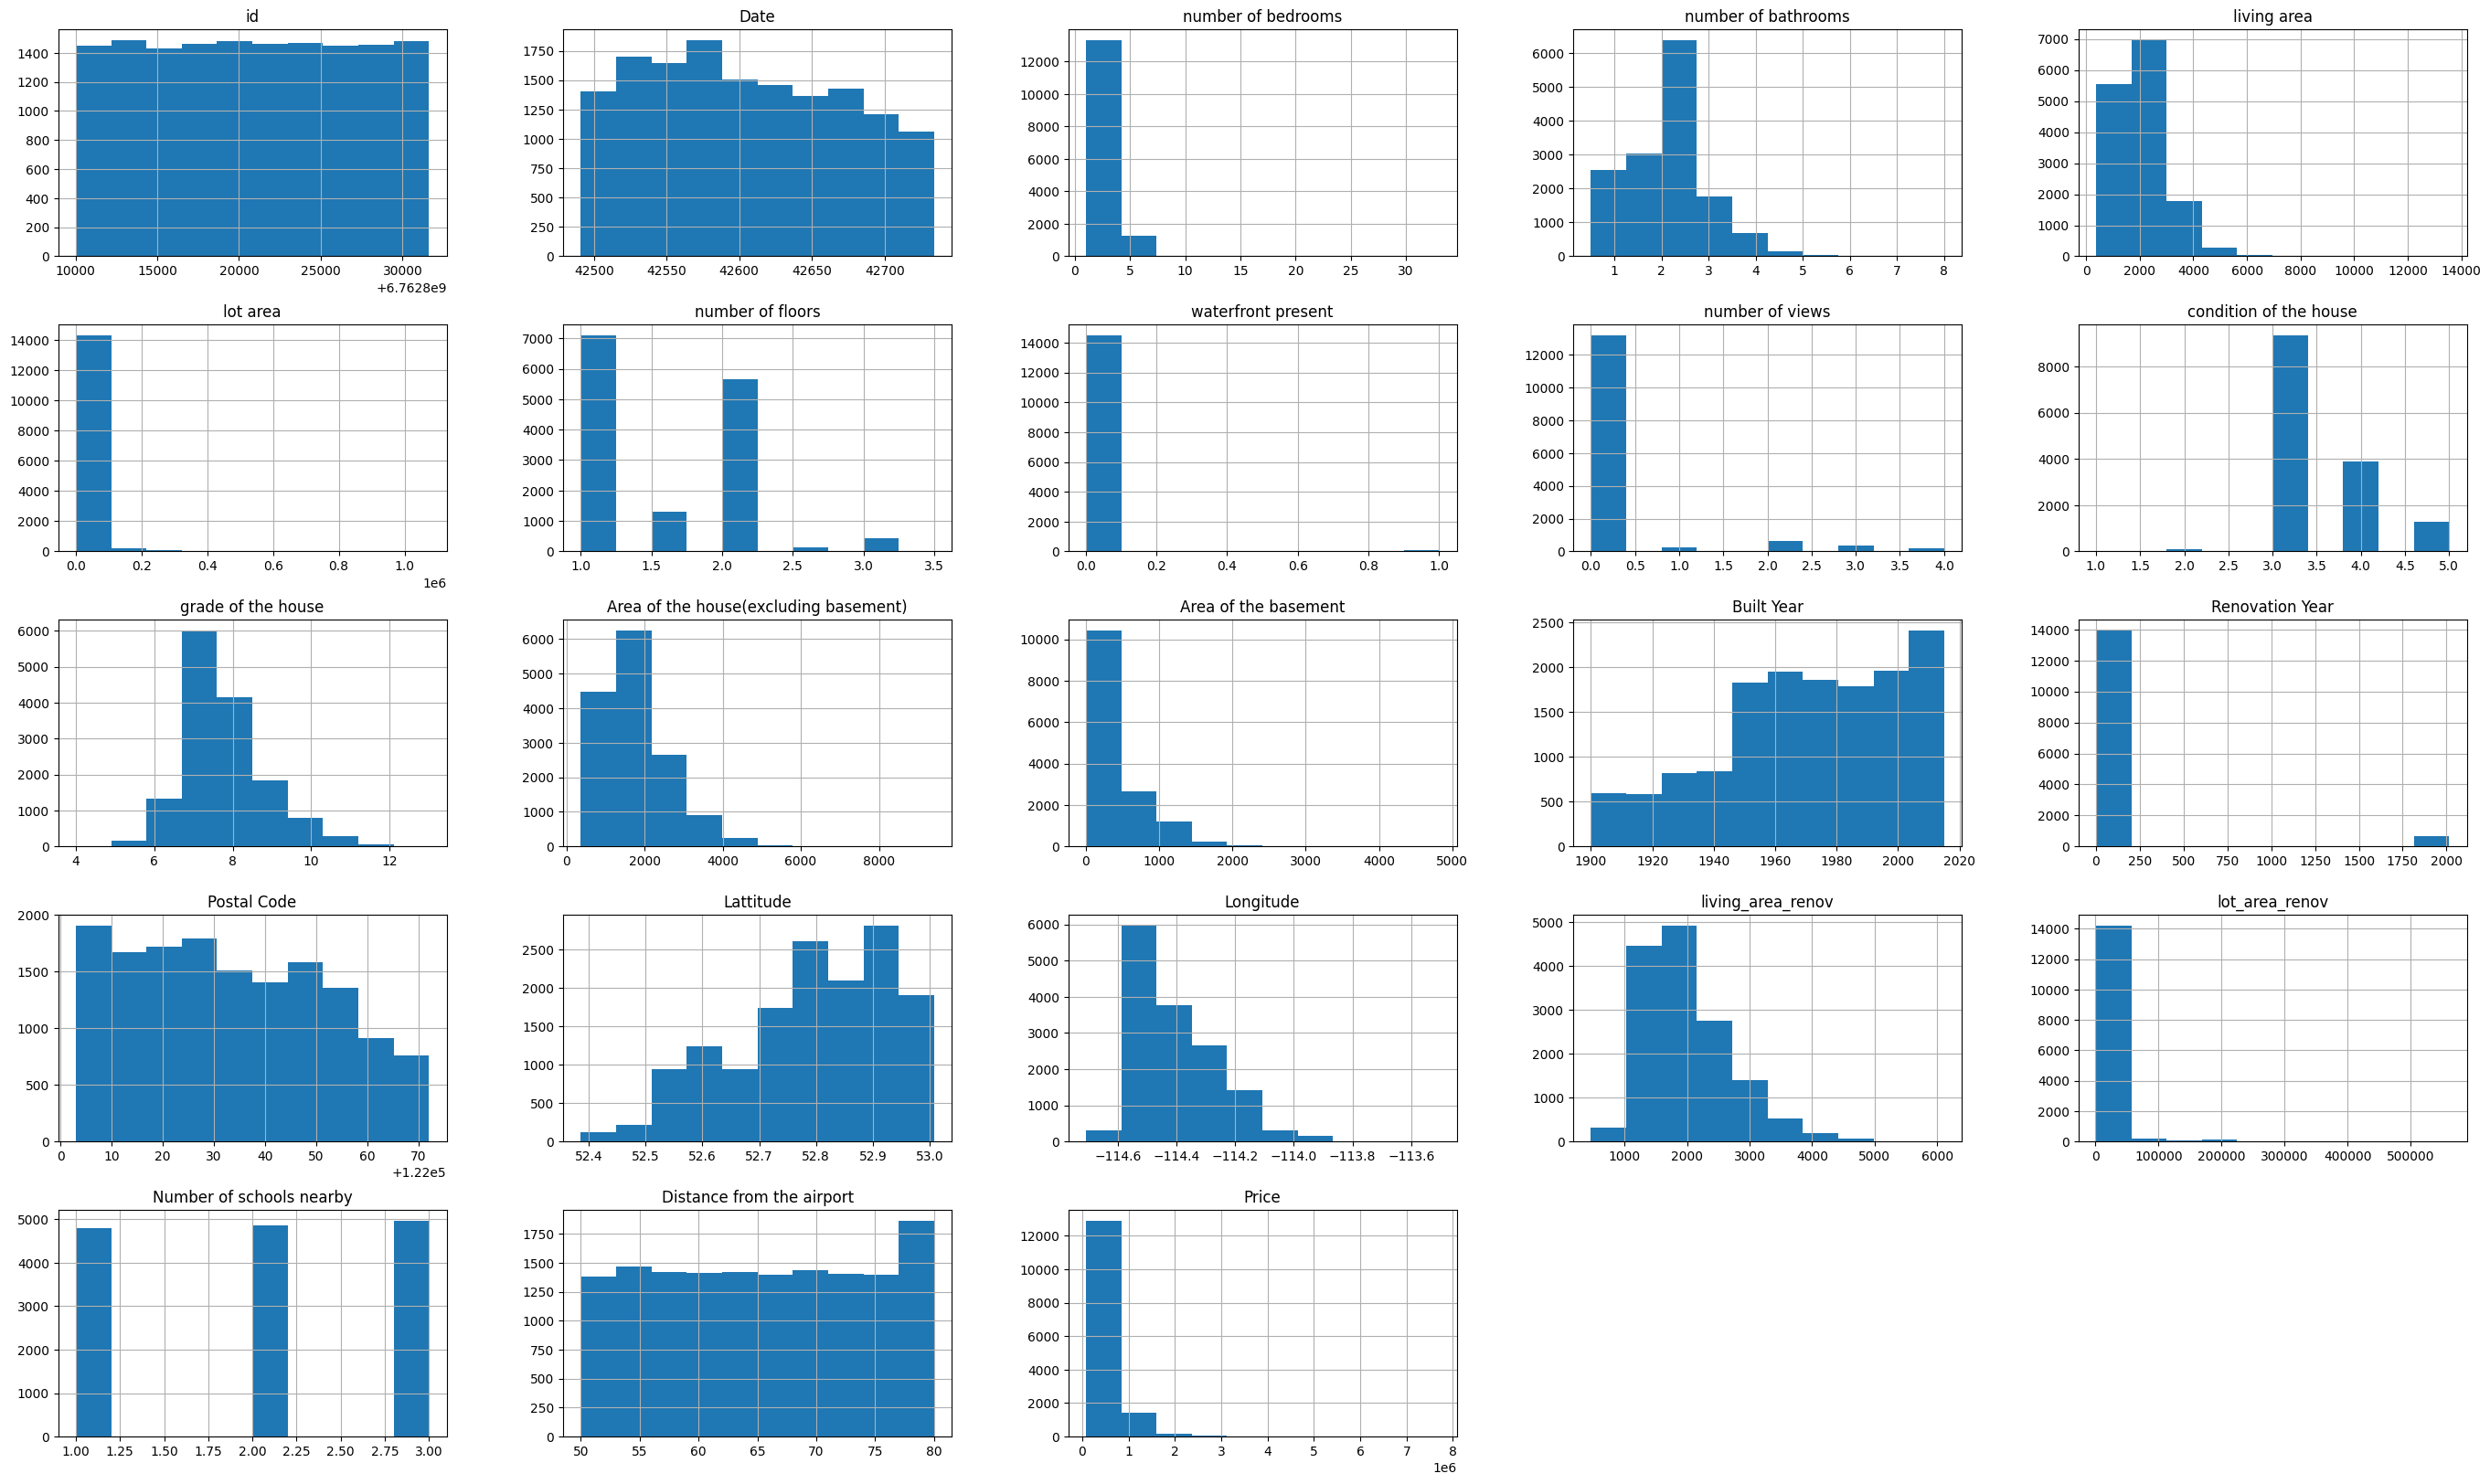

In [ ]:
df.hist(figsize = (34, 20))

Drawing boxplot for every feature will help us to visualize outliers and identify them.

In descriptive statistics, a box plot or **boxplot** is a method for demonstrating graphically the locality, spread and skewness groups of numerical data through their quartiles.

In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called the box-and-whisker plot and the box-and-whisker diagram.

**Outliers** that differ significantly from the rest of the dataset may be plotted as **individual points** beyond the whiskers on the box-plot.

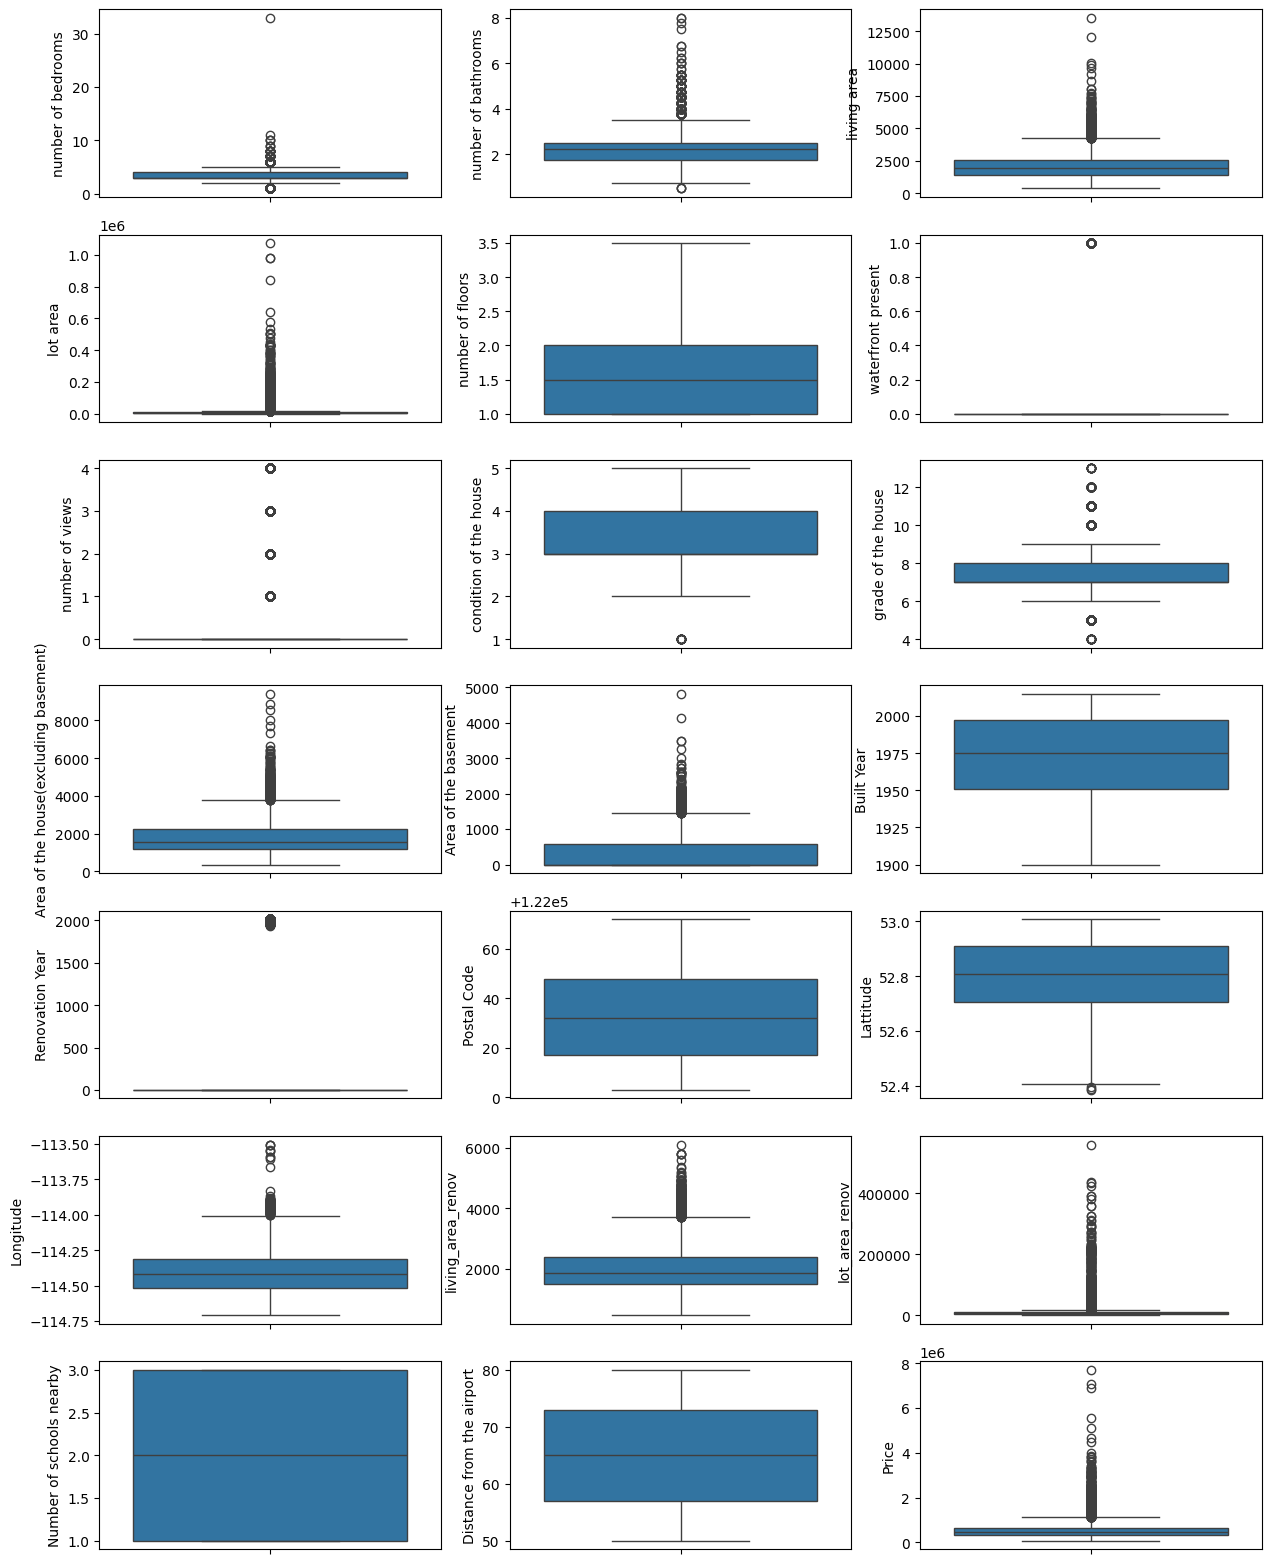

In [ ]:
features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area', 'number of floors', 'waterfront present',
           'number of views', 'condition of the house',  'grade of the house', 'Area of the house(excluding basement)', 'Area of the basement',
           'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov',
           'Number of schools nearby', 'Distance from the airport', 'Price']
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
for idx, feat in  enumerate(features):
    sns.boxplot(y=feat, data=df, ax=axes[idx // 3, idx % 3])

**Outlier detection** is a critical task in data analysis, crucial for ensuring the quality and reliability of conclusions drawn from data.

Different techniques are tailored for varying data types and scenarios, ranging from statistical methods for general data sets to specialized algorithms for spatial and temporal data.

**The Interquartile Range** (IQR) method focuses on the spread of the middle 50% of data. It calculates the IQR as the difference between the 75th and 25th percentiles of the data and identifies outliers as those points that fall below 1.5 times the IQR below the 25th percentile or above 1.5 times the IQR above the 75th percentile. This method is robust to outliers and does not assume a normal distribution.

It is suitable for datasets with skewed or non-normal distributions. Useful for identifying outliers in datasets where the spread of the middle 50% of the data is more relevant than the mean and standard deviation.

Below is an example implementation of an algorithm for removing outliers from a data set using the interquartile range. You can see from the graphs how the data distribution has changed.

(2145, 23)


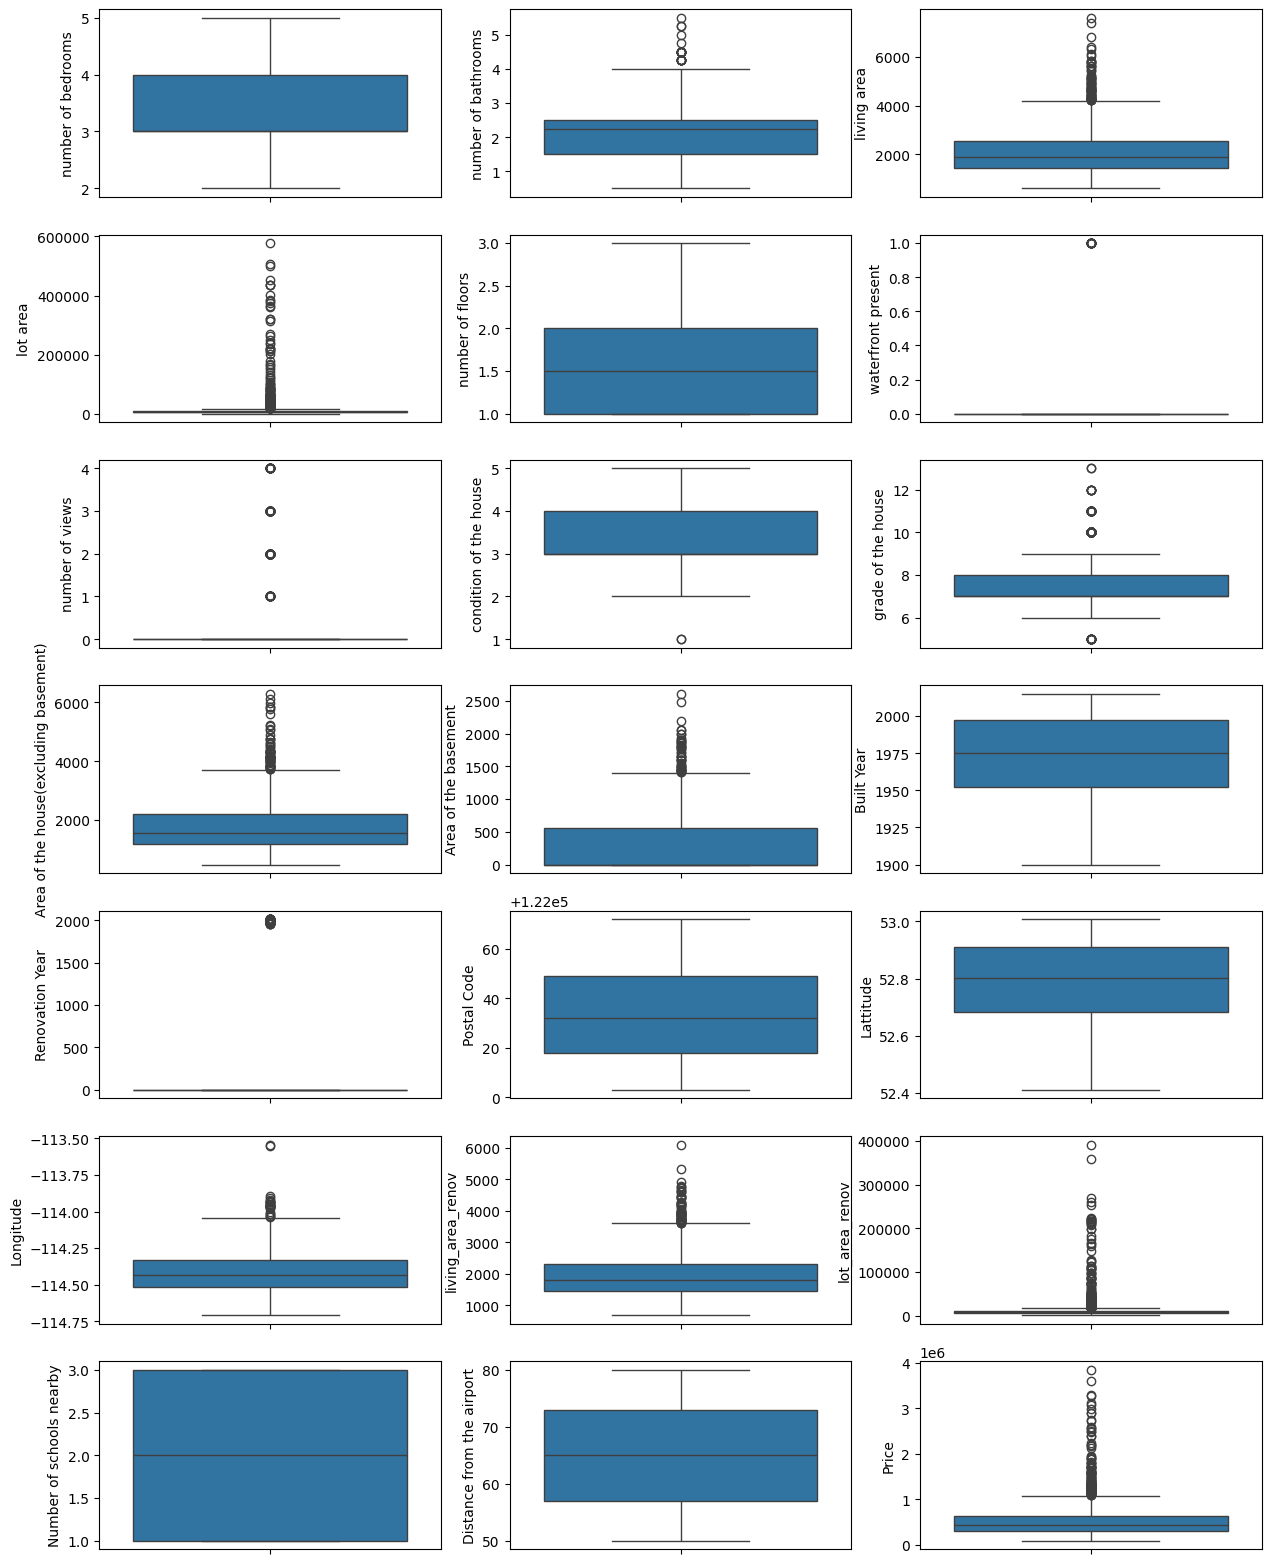

In [ ]:
# IQR
i = 0
for  feat in  features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[feat] >= upper)[0]
    lower_array = np.where(df[feat] <= lower)[0]

    # Removing the outliers

    df = df.drop(index=upper_array, errors='ignore')

    df = df.drop(index=lower_array, errors='ignore')



fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
for idx, feat in  enumerate(features):
    sns.boxplot(y=feat, data=df, ax=axes[idx // 3, idx % 3])
print(df.shape)


Let's look at the descriptive statistics of the modified dataset and analyze how removing outliers affected the parameters of the dataset.

In [ ]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,2.145000e+03,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,...,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03
mean,6.762821e+09,42707.171562,3.345455,2.094289,2074.572494,14982.462005,1.493007,0.010256,0.217716,3.387879,...,1971.373427,86.531935,122033.279254,52.787449,-114.410510,1972.085781,12500.814918,2.000466,65.110956,5.236838e+05
std,6.281506e+03,14.744384,0.812398,0.748286,923.737977,41047.642967,0.536406,0.100777,0.742916,0.639673,...,29.122425,406.572367,19.133220,0.144078,0.136205,689.267439,26415.512687,0.821527,9.063561,3.653432e+05
min,6.762810e+09,42683.000000,2.000000,0.500000,590.000000,635.000000,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.410800,-114.709000,690.000000,748.000000,1.000000,50.000000,9.000000e+04
25%,6.762816e+09,42693.000000,3.000000,1.500000,1420.000000,5108.000000,1.000000,0.000000,0.000000,3.000000,...,1952.000000,0.000000,122018.000000,52.684400,-114.517000,1470.000000,5200.000000,1.000000,57.000000,3.090000e+05
50%,6.762822e+09,42707.000000,3.000000,2.250000,1890.000000,7560.000000,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.802600,-114.434000,1820.000000,7579.000000,2.000000,65.000000,4.317500e+05
75%,6.762827e+09,42719.000000,4.000000,2.500000,2530.000000,10440.000000,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122049.000000,52.910200,-114.329000,2330.000000,9900.000000,3.000000,73.000000,6.221000e+05
max,6.762832e+09,42734.000000,5.000000,5.500000,7620.000000,577605.000000,3.000000,1.000000,4.000000,5.000000,...,2015.000000,2014.000000,122072.000000,53.007500,-113.542000,6110.000000,392040.000000,3.000000,80.000000,3.850000e+06


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>,
        <Axes: title={'center': 'living area'}>],
       [<Axes: title={'center': 'lot area'}>,
        <Axes: title={'center': 'number of floors'}>,
        <Axes: title={'center': 'waterfront present'}>,
        <Axes: title={'center': 'number of views'}>,
        <Axes: title={'center': 'condition of the house'}>],
       [<Axes: title={'center': 'grade of the house'}>,
        <Axes: title={'center': 'Area of the house(excluding basement)'}>,
        <Axes: title={'center': 'Area of the basement'}>,
        <Axes: title={'center': 'Built Year'}>,
        <Axes: title={'center': 'Renovation Year'}>],
       [<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'living_area_renov'}>,
    

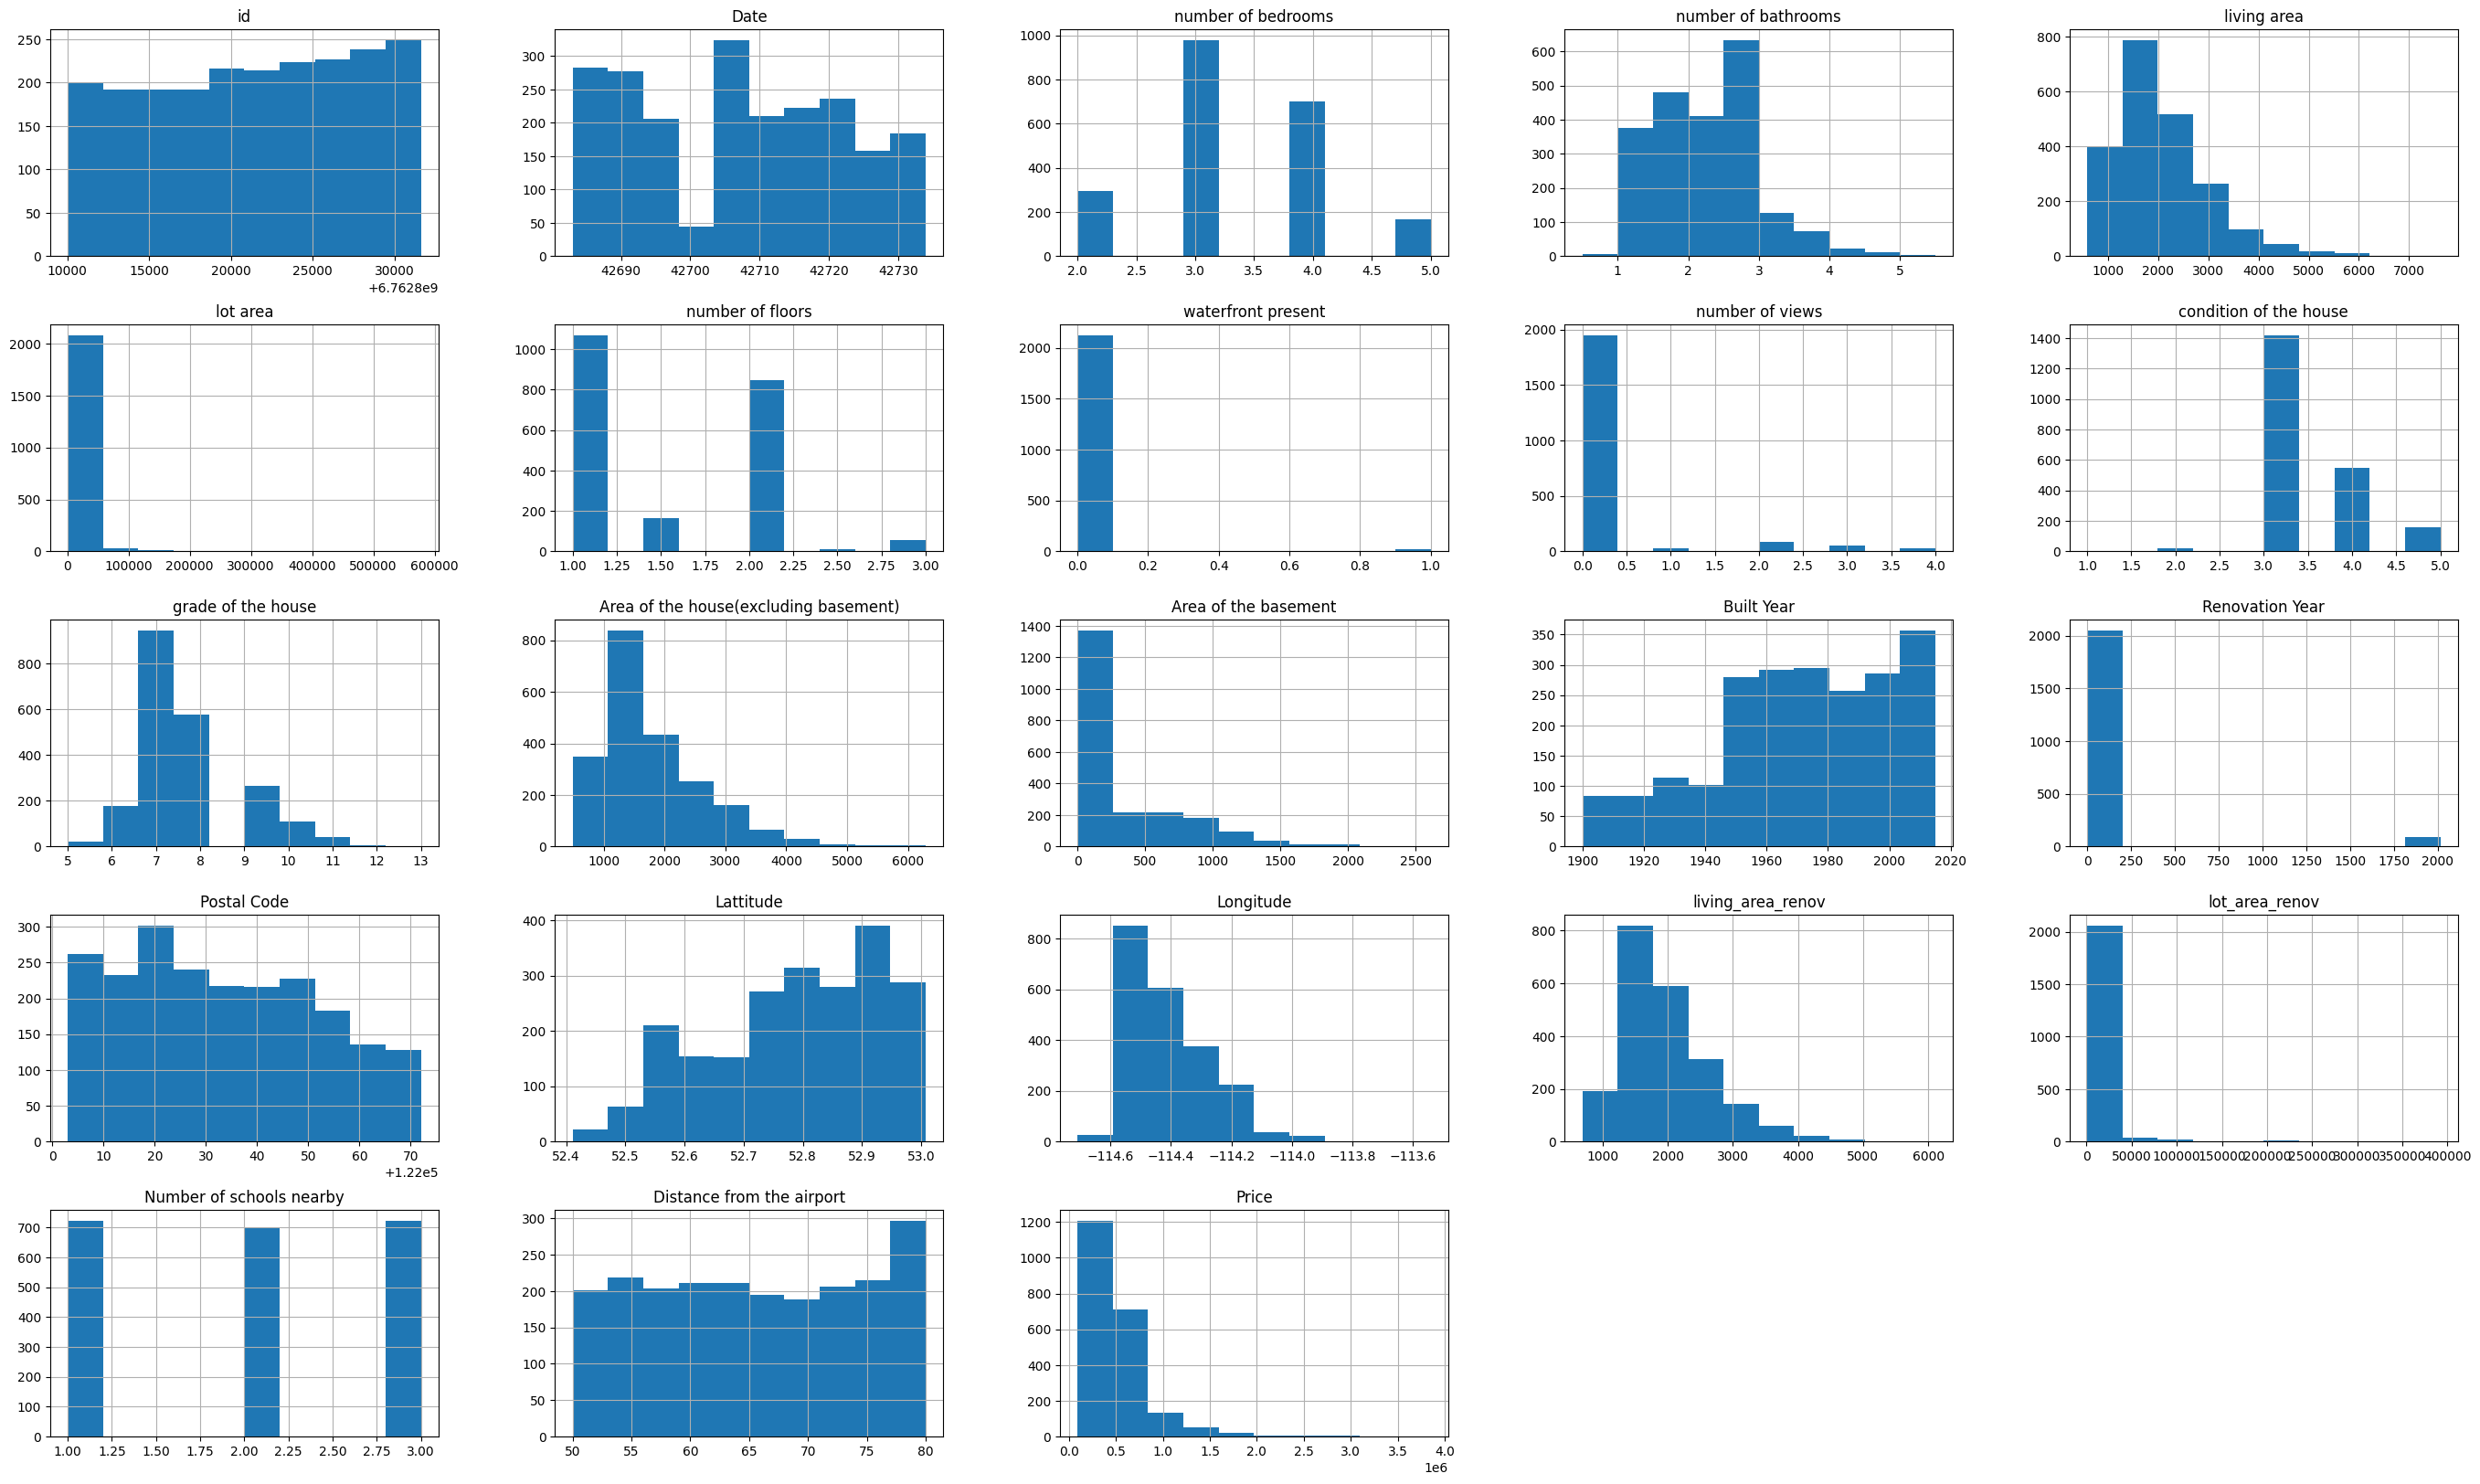

In [ ]:
df.hist(figsize = (34, 20))

It is important to note that the size of the data set has been greatly reduced (from 14,000 to 2,000). Let's consider another method for removing outliers to compare the performance of the algorithm and the result obtained.

The **Z-score** method calculates the number of standard deviations each data point is from the mean. A Z-score threshold is set, commonly 3 or 2, and any data point with a Z-score exceeding this threshold is considered an outlier. This method assumes a normal distribution and is sensitive to extreme values in small datasets.

Suitable for datasets with large sample sizes and where the underlying distribution of the data can be reasonably approximated by a normal distribution.

Let's see two examples of using the Z-score method with thresholds equal to **3 and 2**, get visualization, and compare them with the IQR.

(11966, 23)


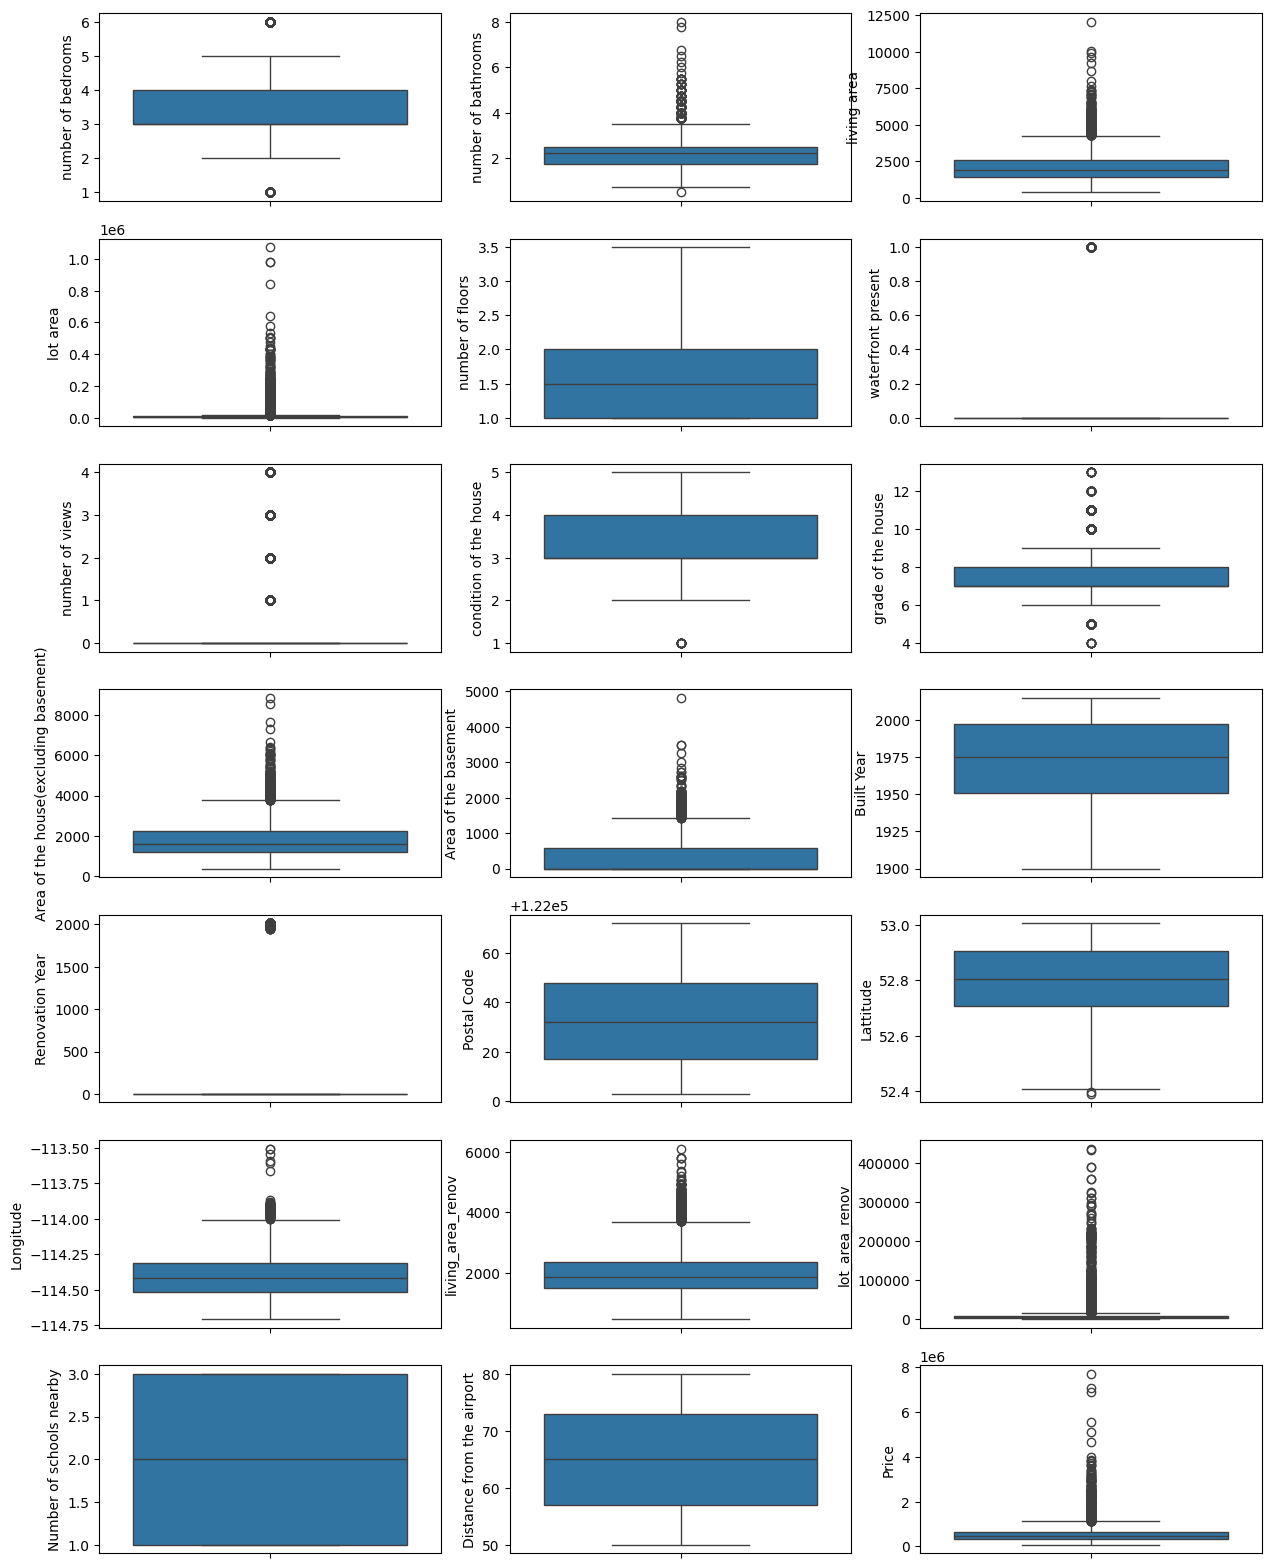

In [ ]:
df = pd.read_csv('House Price India.csv')
for feat in features:
  z = np.abs(stats.zscore(df[feat]))
  threshold_z = 3
  outlier_indices = np.where(z > threshold_z)[0]
  df = df.drop(outlier_indices, errors='ignore')
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
for idx, feat in  enumerate(features):
    sns.boxplot(y=feat, data=df, ax=axes[idx // 3, idx % 3])
print(df.shape)

In [ ]:
df.describe()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.196600e+04,11966.000000,11966.000000,11966.000000,11966.000000,1.196600e+04,11966.000000,11966.000000,11966.000000,11966.000000,...,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,11966.000000,1.196600e+04
mean,6.762821e+09,42606.844977,3.365703,2.122514,2095.079977,1.514909e+04,1.504471,0.007772,0.230319,3.429550,...,1970.959134,90.748621,122033.045546,52.792624,-114.404107,1995.078472,12739.027160,2.014123,64.918018,5.387966e+05
std,6.233925e+03,68.407498,0.874474,0.760538,921.731515,3.885849e+04,0.540427,0.087819,0.762649,0.662159,...,29.571794,415.856342,19.075350,0.137294,0.141112,691.157047,25713.478435,0.816391,8.953418,3.681014e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,6.350000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.389300,-114.709000,460.000000,651.000000,1.000000,50.000000,8.300000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707825,-114.519000,1490.000000,5080.000000,1.000000,57.000000,3.201500e+05
50%,6.762821e+09,42602.000000,3.000000,2.250000,1930.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806050,-114.421000,1850.000000,7628.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42665.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908400,-114.314000,2370.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,6.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,438213.000000,3.000000,80.000000,7.700000e+06


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>,
        <Axes: title={'center': 'living area'}>],
       [<Axes: title={'center': 'lot area'}>,
        <Axes: title={'center': 'number of floors'}>,
        <Axes: title={'center': 'waterfront present'}>,
        <Axes: title={'center': 'number of views'}>,
        <Axes: title={'center': 'condition of the house'}>],
       [<Axes: title={'center': 'grade of the house'}>,
        <Axes: title={'center': 'Area of the house(excluding basement)'}>,
        <Axes: title={'center': 'Area of the basement'}>,
        <Axes: title={'center': 'Built Year'}>,
        <Axes: title={'center': 'Renovation Year'}>],
       [<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'living_area_renov'}>,
    

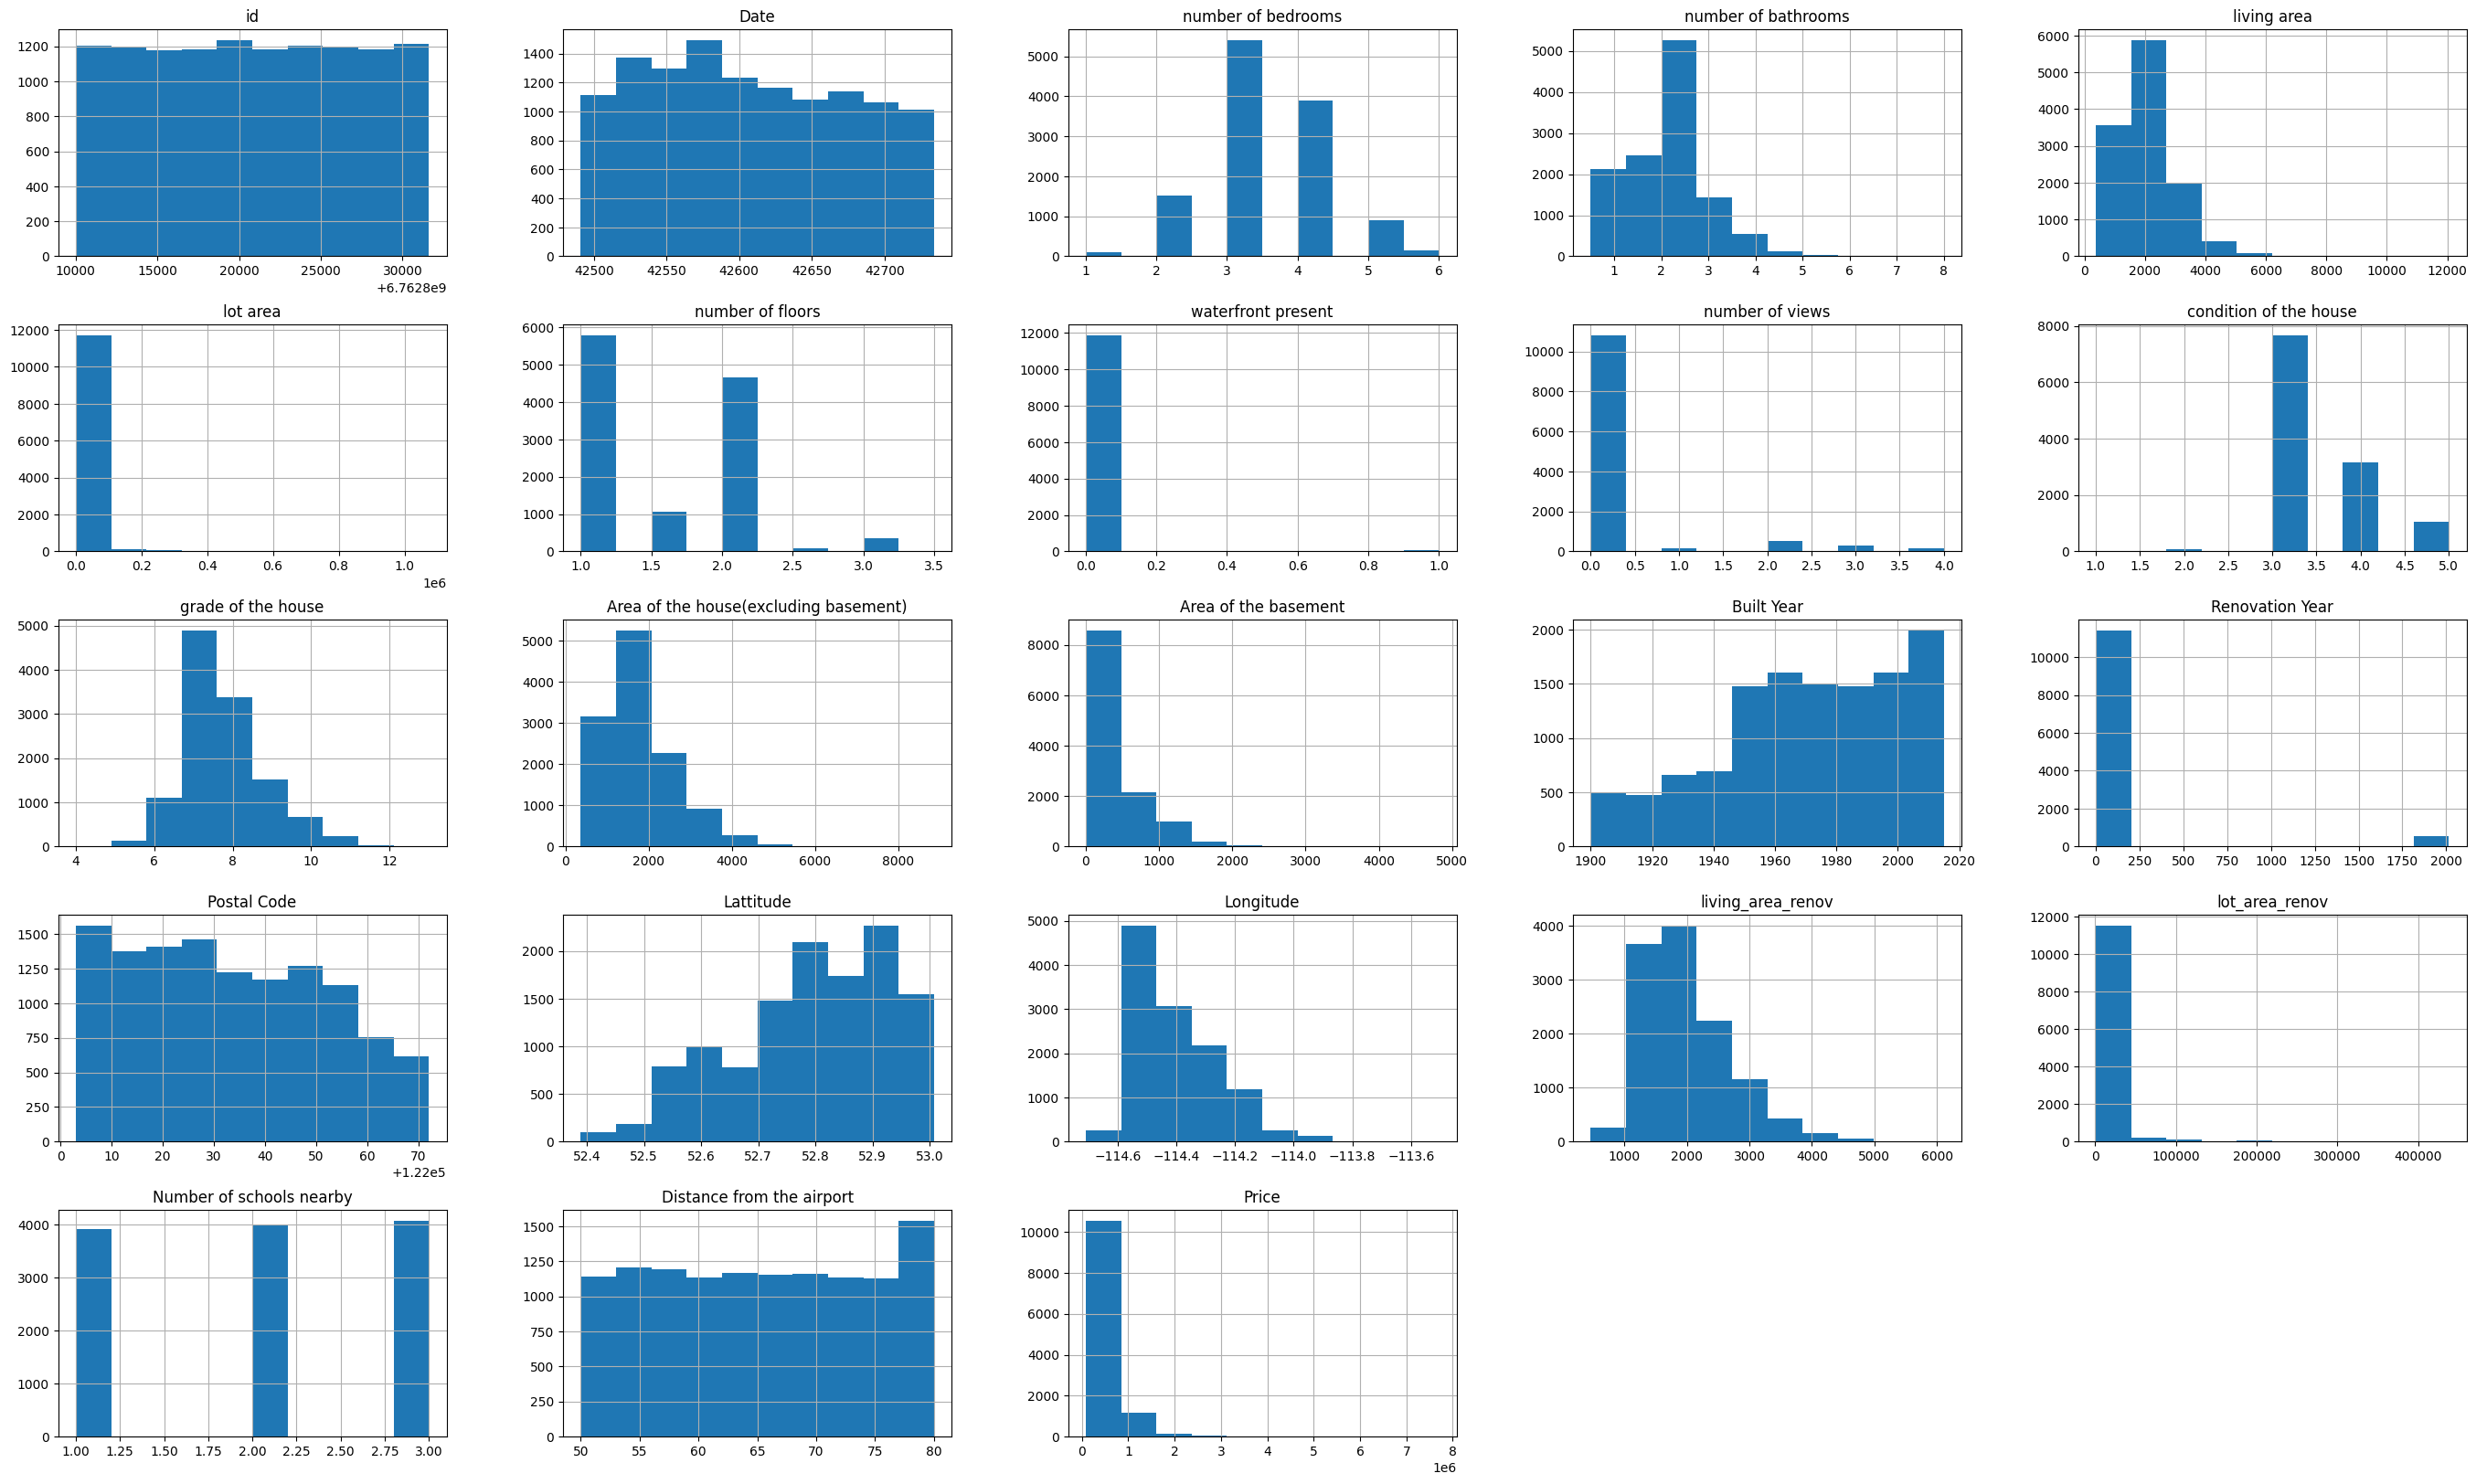

In [ ]:
df.hist(figsize = (34, 20))

(8610, 23)


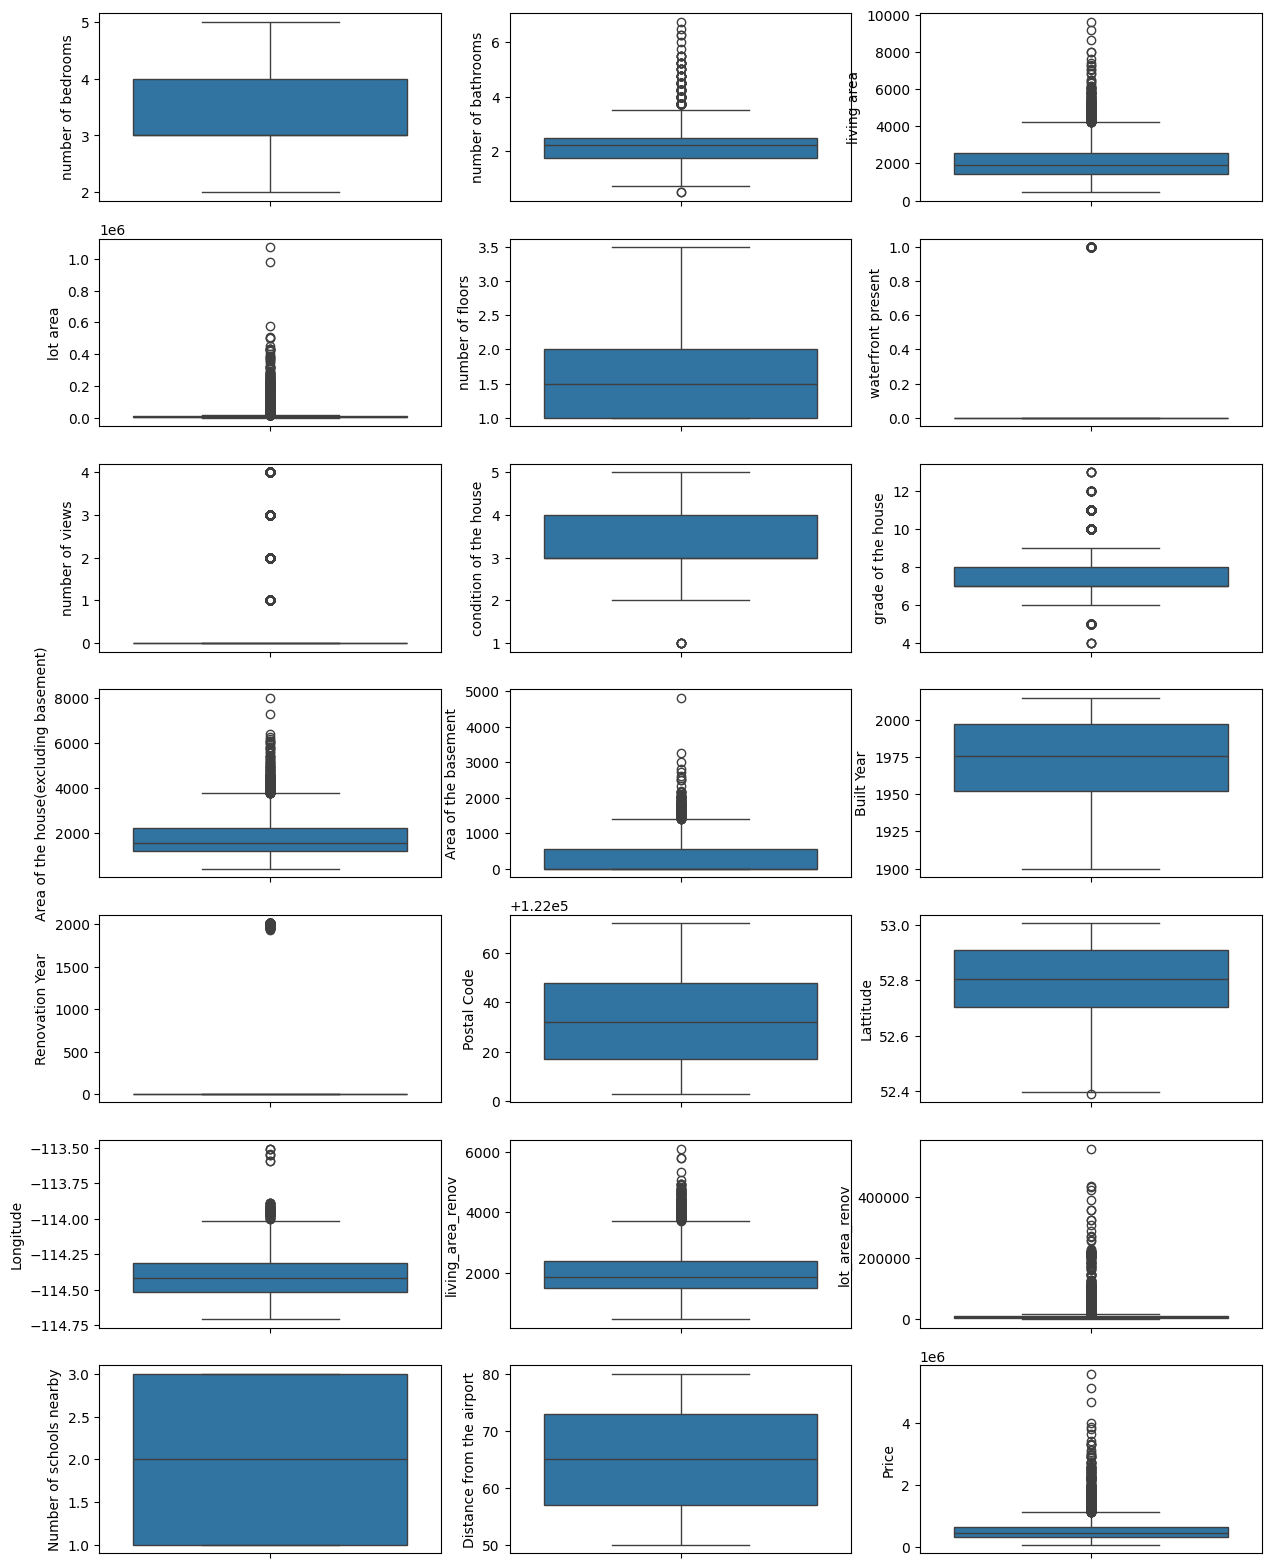

In [ ]:
df = pd.read_csv('House Price India.csv')
for feat in features:
  z = np.abs(stats.zscore(df[feat]))
  threshold_z = 2
  outlier_indices = np.where(z > threshold_z)[0]
  df = df.drop(outlier_indices, errors='ignore')
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 20))
for idx, feat in  enumerate(features):
    sns.boxplot(y=feat, data=df, ax=axes[idx // 3, idx % 3])
print(df.shape)

In [ ]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,8.610000e+03,8610.000000,8610.000000,8610.000000,8610.000000,...,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8610.000000,8.610000e+03
mean,6.762821e+09,42620.845296,3.355285,2.121690,2089.884901,1.518356e+04,1.505110,0.008595,0.232404,3.420790,...,1971.400348,86.221603,122033.019048,52.792302,-114.402811,1997.002787,13061.476307,2.006736,64.964692,5.353193e+05
std,6.227372e+03,70.082441,0.800611,0.745534,905.348731,3.805335e+04,0.541921,0.092313,0.768315,0.652958,...,29.247310,405.783152,19.004224,0.138709,0.140911,685.152051,27372.784054,0.819640,8.891829,3.525419e+05
min,6.762810e+09,42491.000000,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.389300,-114.709000,460.000000,659.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42559.250000,3.000000,1.750000,1440.000000,5.029000e+03,1.000000,0.000000,0.000000,3.000000,...,1952.000000,0.000000,122017.000000,52.703425,-114.517000,1500.000000,5117.000000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42628.000000,3.000000,2.250000,1920.000000,7.625500e+03,1.500000,0.000000,0.000000,3.000000,...,1976.000000,0.000000,122032.000000,52.806250,-114.418000,1850.000000,7650.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42683.000000,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.909500,-114.314000,2390.000000,10166.500000,3.000000,73.000000,6.400000e+05
max,6.762832e+09,42734.000000,5.000000,6.750000,9640.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,5.570000e+06


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>,
        <Axes: title={'center': 'living area'}>],
       [<Axes: title={'center': 'lot area'}>,
        <Axes: title={'center': 'number of floors'}>,
        <Axes: title={'center': 'waterfront present'}>,
        <Axes: title={'center': 'number of views'}>,
        <Axes: title={'center': 'condition of the house'}>],
       [<Axes: title={'center': 'grade of the house'}>,
        <Axes: title={'center': 'Area of the house(excluding basement)'}>,
        <Axes: title={'center': 'Area of the basement'}>,
        <Axes: title={'center': 'Built Year'}>,
        <Axes: title={'center': 'Renovation Year'}>],
       [<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'living_area_renov'}>,
    

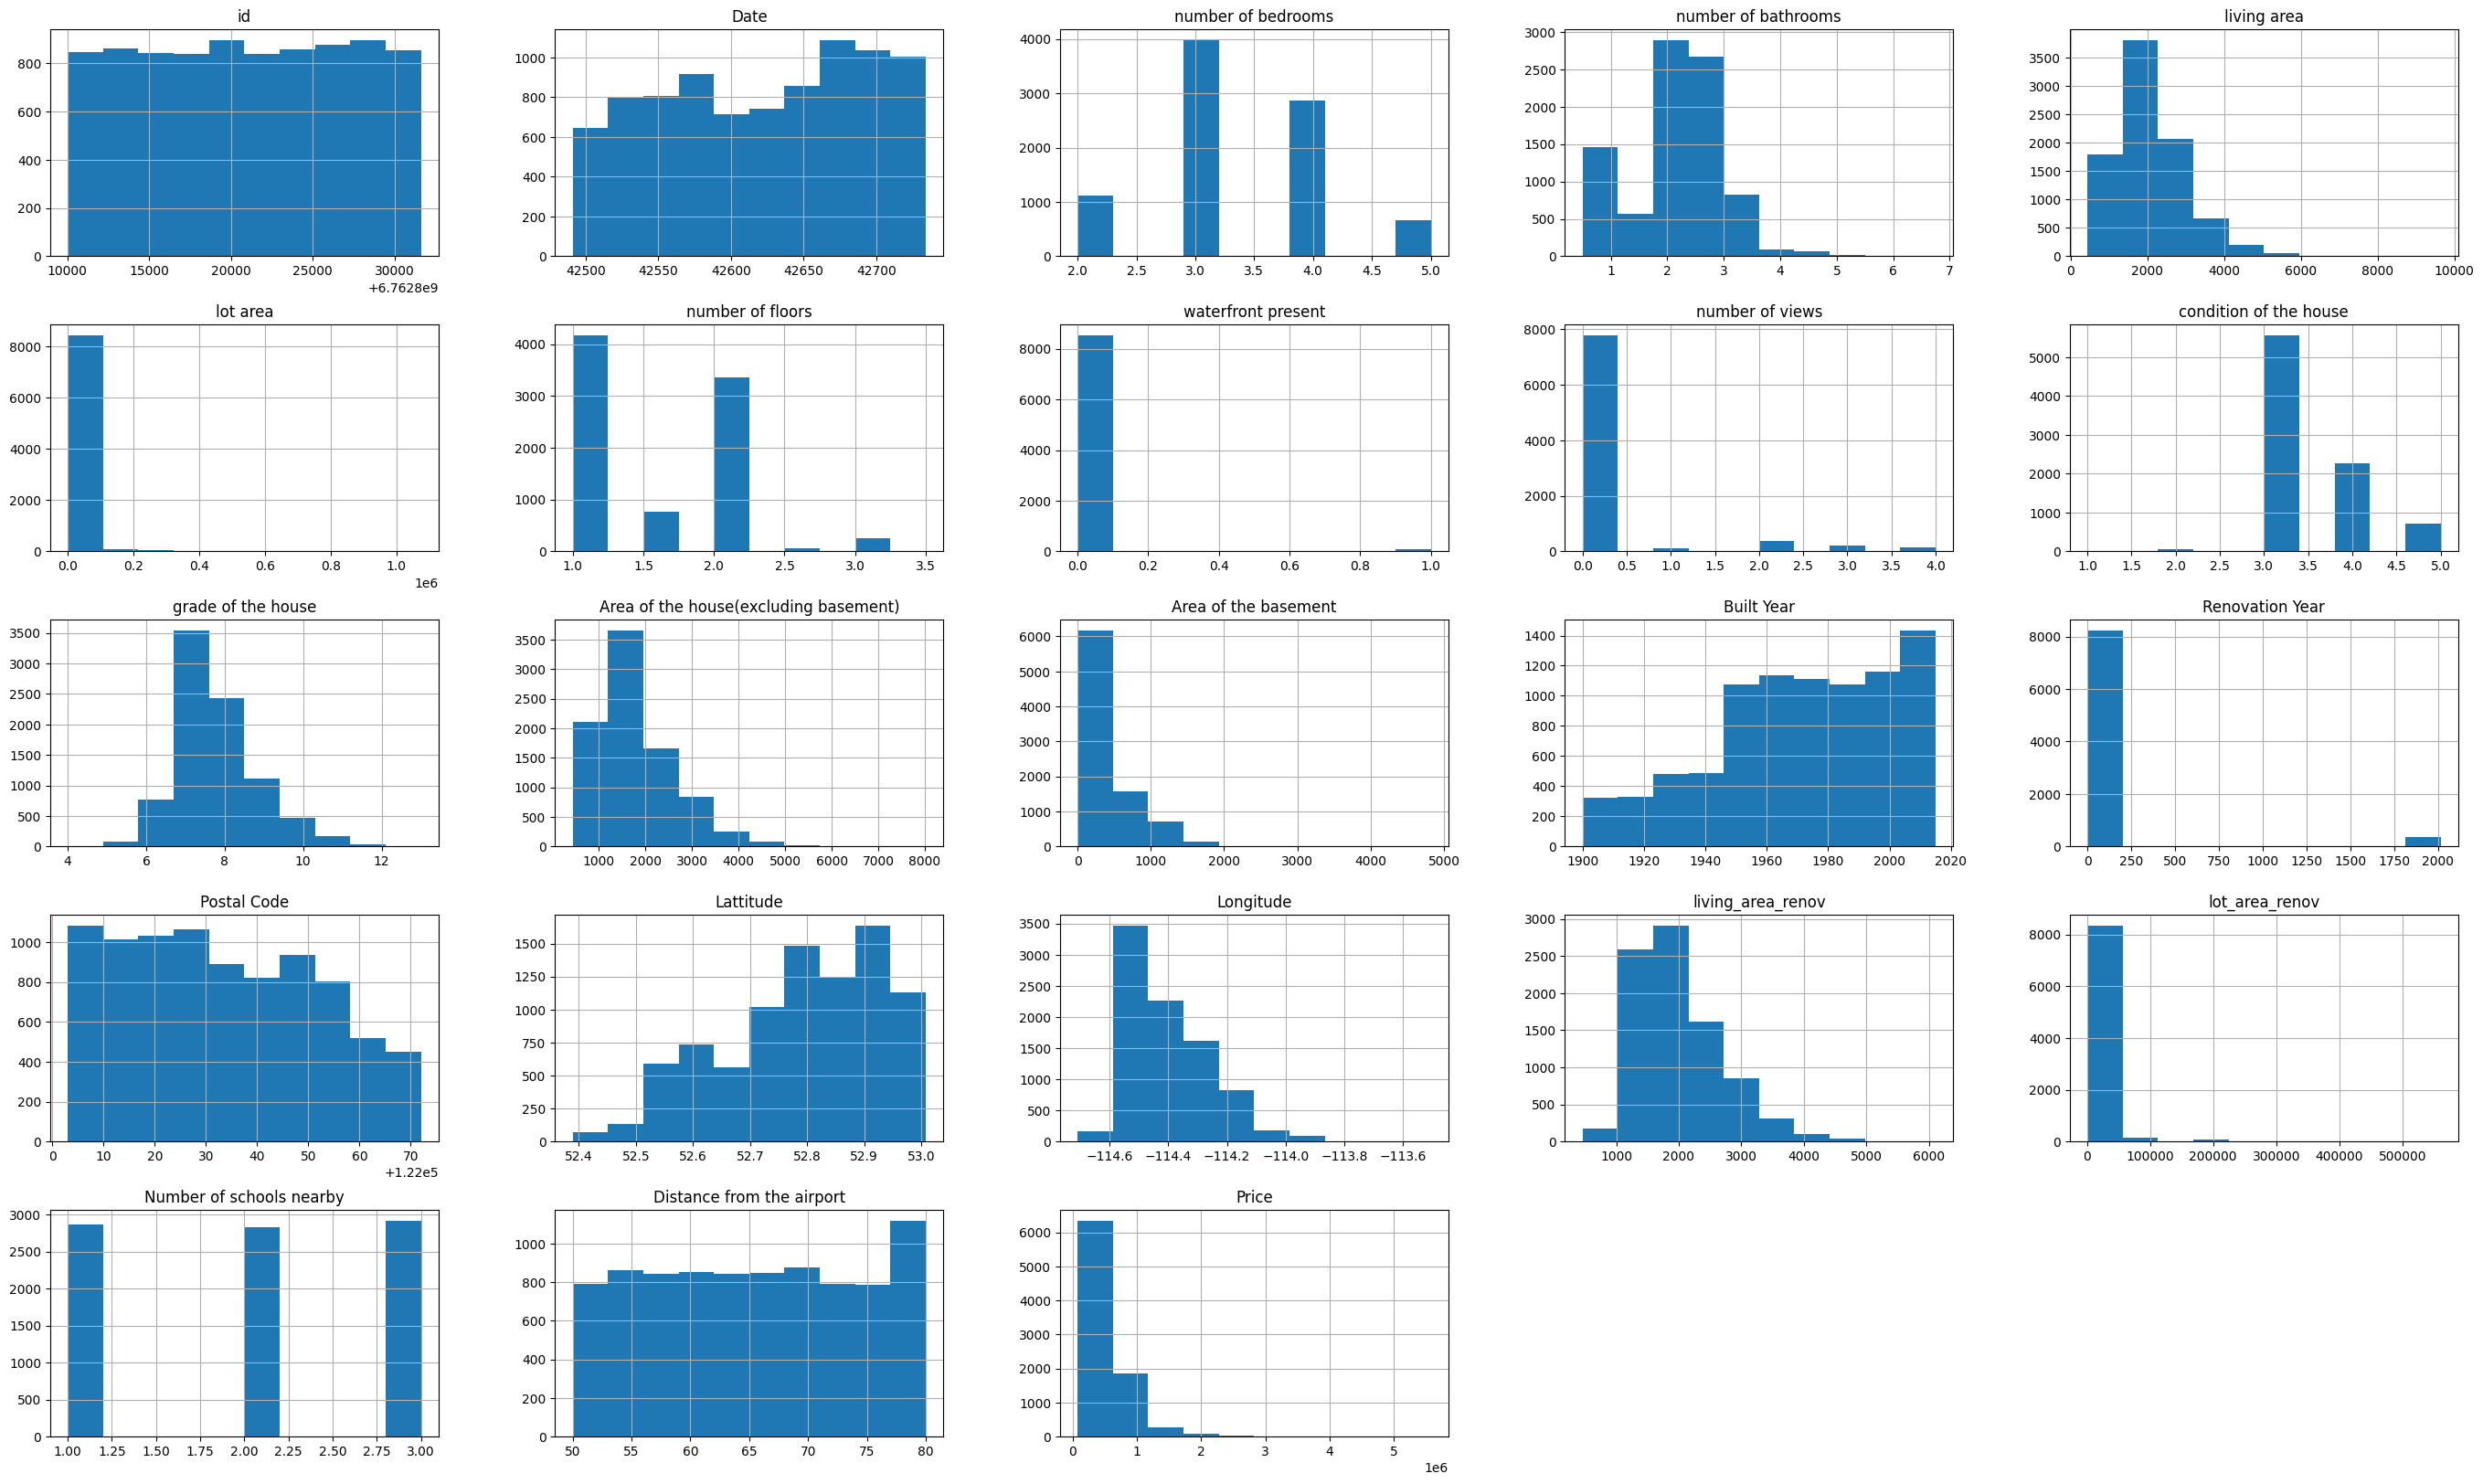

In [ ]:
df.hist(figsize = (34, 20))

As a result of the algorithms' work, we received three different data sets. The **Z-score** method with threshold equale to 3 cleaned emissions with the least losses. Most often, it is used to remove outliers.


Effective outlier detection is pivotal for enhancing data accuracy and reliability, forming the foundation for robust, data-driven decisions across various fields. As data collection grows in scale and complexity, the tools and techniques for outlier detection will become more advanced, driving significant improvements in fields ranging from healthcare to environmental science. Understanding and implementing these techniques is crucial for professionals involved in data-intensive projects, ensuring the integrity and usefulness of their analyses.